# **Question 1**

In [335]:
# Importing required packages

import numpy as np
import matplotlib.pyplot as plt

In [359]:
# Generating the random 16-bit sequence, changing 0 to -1

Ik = np.random.randint(2, size=16)
Ik[Ik==0] = -1

In [360]:
print("Generated random 16-bit sequence =", Ik)

Generated random 16-bit sequence = [ 1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1]


In [361]:
# Function to calculate the value of g(t) at the sample instants

def gt(J, L, beta, T):
    Ts = np.linspace(-L*T, L*T, 2*L*J+1)
    gn = np.zeros_like(Ts)
    if beta > 0:
        lim_indices = (Ts==T/(2*beta)) + (Ts==-T/(2*beta))

        # If beta is non-zero, there is the possibility of (cos(pi*beta*t/T))/(1-4*beta**2*t**2/T**2) turning to zero-by-zero form, at t = +/- T/(2*beta).
        # Therefore, we need to take care of this case, and equate g(t) to the limit value at these instants
        gn[lim_indices] = np.pi/(4*T)*np.sinc(1/(2*beta))

        # Normal value of g(t) everywhere else
        gn[lim_indices==False] = np.sinc(Ts[lim_indices==False]/T)*(np.cos(np.pi*beta*Ts[lim_indices==False]/T))/(1-4*beta**2*Ts[lim_indices==False]**2/T**2)
    else:
        gn = np.sinc(Ts/T)*(np.cos(np.pi*beta*Ts/T))/(1-4*beta**2*Ts**2/T**2)
    return gn

In [363]:
# Function to interleave the sequence I(k) with J-1 zeros

def interleave(I, J):
    zeros = np.zeros((len(I), J-1))
    I = I[:, np.newaxis]
    I_out = np.concatenate((I, zeros), axis=1)
    I_out = I_out.flatten()[:1-J]       # Removing the extra zeros at the very end
    return I_out

In [364]:
# Function to generate the output sequence x(t) using the previous functions and convolution

def xkT(I, J, L, beta, T):
    I = interleave(I,J)
    gn = gt(J, L, beta, T)
    x = np.convolve(I, gn)

    # Output is going to have a lower limit of -L*T, and an upper limit of len(I)//J*T + L*T. This is because of the convolution.
    # We make sure to sample at the required time instants to generate an x-axis for plotting.
    
    t = np.linspace(-L*T, (len(I)//J + L)*T ,2*L*J+len(I))

    return x, t

## Parts (a), (b)

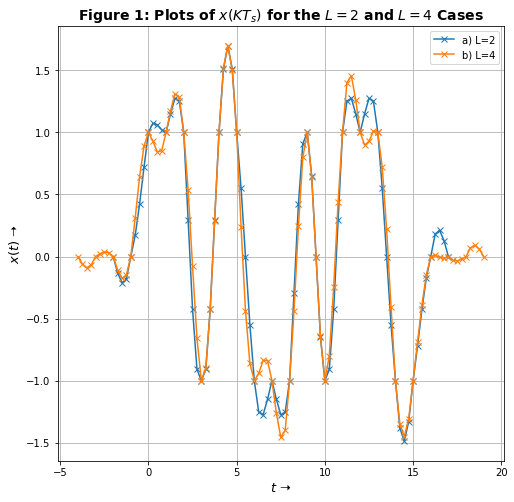

In [373]:
x2, t2 = xkT(Ik, J=4, L=2, beta=0, T=1)     # Part (a)
x4, t4 = xkT(Ik, J=4, L=4, beta=0, T=1)     # Part (b)

plt.figure(figsize=(8,8))
plt.plot(t2,x2, 'x-', label = "a) L=2")
plt.plot(t4,x4, 'x-', label = "b) L=4")
plt.legend()
plt.grid(True)
plt.title("Figure 1: Plots of $x(KT_s)$ for the $L=2$ and $L=4$ Cases", fontweight = 'bold', fontsize=14)
plt.xlabel("$t$ \u279d", fontweight='bold', fontsize=13)
plt.ylabel("$x(t)$ \u279d", fontweight='bold', fontsize=13)
plt.show()

## Part (c)

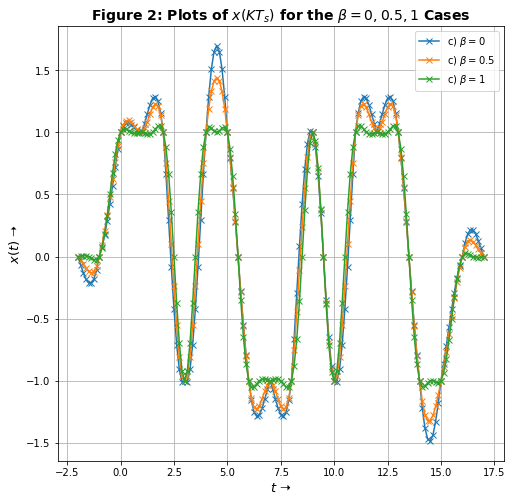

In [376]:
# Fixing J = 8, L =2 for all beta values

x0, t0 = xkT(Ik, J=8, L=2, beta=0, T=1)
x05, t05 = xkT(Ik, J=8, L=2, beta=0.5, T=1)
x1, t1 = xkT(Ik, J=8, L=2, beta=1, T=1)

plt.figure(figsize=(8,8))
plt.plot(t0,x0, 'x-', label = r"c) $\beta=0$")
plt.plot(t05,x05, 'x-', label = r"c) $\beta=0.5$")
plt.plot(t1,x1, 'x-', label = r"c) $\beta=1$")
plt.legend()
plt.grid(True)
plt.title(r"Figure 2: Plots of $x(KT_s)$ for the $\beta=0, 0.5, 1$ Cases", fontweight = 'bold', fontsize=14)
plt.xlabel("$t$ \u279d", fontweight='bold', fontsize=13)
plt.ylabel("$x(t)$ \u279d", fontweight='bold', fontsize=13)
plt.show()

## Part (d)

In part (b), a larger value of L means a larger truncated filter. Since the filter length is larger, we also have a larger output sequence for L = 4.

The filter has a larger support in the time domain and is derived from a $sinc$ impulse response. Intuitively, the filter must be similar to a rectangular pulse in the frequency domain, with smaller support. Therefore, this means that there are fewer higher frequency components in the output sequence for L = 4 than for L = 2. <br><br>

In part (c), $\beta$ is indicative of the excess frequency bandwidth. We can see that for $\beta = 0$, the output is very oscillatory and smooth like a combination of sinusoids. For $beta = 1$, however, the peaks are flattened, much like a square wave whose Fourier series has infinite frequency components. The rougher and sharper the edges, the more frequency components are involved in shaping the signal that way. This is in alignment with the higher $\beta$ (excess bandwidth factor) value.  

# **Question 2**

In [377]:
# Importing required packages

import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

In [379]:
# Function to conveniently calculate Q-value using the erfc function

def Q(num):
    return 1/2*sp.erfc(num/np.sqrt(2))  # Q(x) = (1/2)*erfc(x/sqrt(2))

## Part (a)

In [413]:
Eb = 1      # Fixed value of Eb

N0 = np.logspace(0,-1,6, base = 10)     # Generates N0 values such that 10log(SNR) = 0, 2, 4, 6, 8, 10 dB as required
log_SNR = 10*np.log10(Eb/N0)

Q_val_BPSK = np.sqrt(2*Eb/N0)
P_e_BPSK = Q(Q_val_BPSK)                # Error probability for BPSK = Q(sqrt(2Eb/N0))

Q_val_QPSK = np.sqrt(2*Eb/N0)
P_e_QPSK = 2*Q(Q_val_QPSK)*(1-1/2*Q(Q_val_QPSK))        # Error probability for QPSK = 2Q(sqrt(2Eb/N0)) (1 - 0.5Q(sqrt(2Eb/N0)))

Q_val_QAM = np.sqrt(2*Eb/N0)/np.sqrt(2.5)               # d = sqrt(Es/10) for a 16QAM, and Es = 4*Eb because of 4 bits. Therefore, d = sqrt(Eb/2.5)
                                                        # Thus, a factor of 1/sqrt(2.5) appears in the Q-value
P_e_QAM = 2*3/2*Q(Q_val_QAM)*(1-1/2*3/2*Q(Q_val_QAM))   # Error probability for QPSK = 2*(3/2)Q(.) (1 - 0.5*3/2*Q(.))

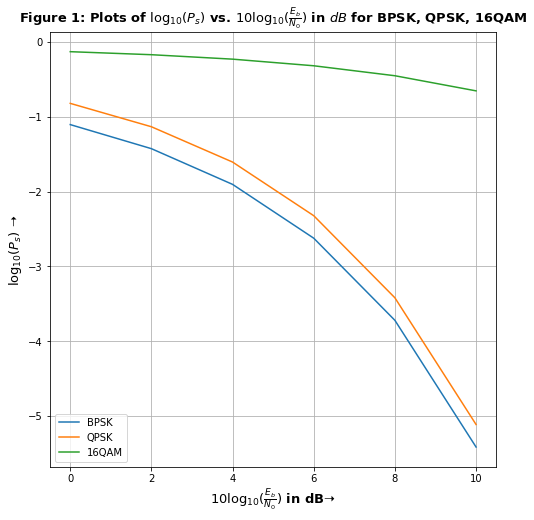

In [412]:
plt.figure(figsize=(8,8))

plt.plot(log_SNR, np.log10(P_e_BPSK), label = "BPSK")   # Plotting the log values of the error probabilities on the y-axis
plt.plot(log_SNR, np.log10(P_e_QPSK), label = "QPSK")
plt.plot(log_SNR, np.log10(P_e_QAM), label = "16QAM")

plt.legend()
plt.grid(True)

plt.title(r"Figure 1: Plots of $\log_{10}(P_s)$ vs. $10\log_{10}(\frac{E_b}{N_0})$ in $dB$ for BPSK, QPSK, 16QAM", fontweight = 'bold', fontsize=13)
plt.xlabel(r"$10\log_{10}(\frac{E_b}{N_0})$ in dB" +"\u279d", fontweight='bold', fontsize=13)
plt.ylabel("$\log_{10}(P_s)$ \u279d", fontweight='bold', fontsize=13)

plt.show()

- With decreasing $N_0$, the error probability drops significantly for BPSK and QPSK. It also decreases for 16QAM, but not by a large fraction.

## Parts (b), (c)

In [395]:
# The nearest neighbours are at a distance of 2*sqrt(Eb) = 2d = 2 in the case of QPSK.
# Therefore, the input to the Q-function remains the same as the BPSK case.

Q_val_near= np.sqrt(2*Eb/N0)

# The distance to the farthest neighbour (diagonally opposite) is sqrt(2) times the distance to the nearest neighbours
# Therefore, input to the Q-function gets multiplied by sqrt(2) as well.

Q_val_far = Q_val_near*np.sqrt(2)

# Part (b1) : union bound based on all pairs of neighbours - two nearest neighbours and one farthest neighbour
# Part (b2) : union bouond based on nearest neighbours - two in number
# Part (c) : Chernoff bound
# Since each point in the constellation is equally likely, analysis is done for any one of them

p_unionbound_b1 = 2*Q(Q_val_near) + Q(Q_val_far)
p_unionbound_b2 = 2*Q(Q_val_near)
p_chernoff_b3 = 2*np.exp(-np.sqrt(Eb)**2/N0)

In [417]:
d = np.sqrt(Eb) # equal to 1

# Generating transmitted complex symbols, real and imaginary parts as two random variables 

real = np.random.uniform(size=10**5)        # First using a uniform r.v. in [0,1)
real[real<0.5] = -d                        # Between 0 and 0.5 mapping to -d
real[real>=0.5] = d                          # Between 0.5 and 1 mapping to +d

img = np.random.uniform(size=10**5)         # Similarly for the imaginary part
img[img<0.5] = -d
img[img>=0.5] = d

In [397]:
# List to store value of Simulation SER for each value of N0 for QPSK
QPSK_SER_list = []

for n0 in N0:
    real_pred = real + np.random.normal(loc=0, scale=np.sqrt(n0/2), size=10**5)     # Adding Gaussian noise to transmitted real value
    real_pred[real_pred<=0] = -d
    real_pred[real_pred>0] = d                          # Using the correlation metric threshold decision rule to decide received value 

    img_pred = img + np.random.normal(loc=0, scale=np.sqrt(n0/2), size=10**5)       # Similarly for imaginary part
    img_pred[img_pred<=0] = -d
    img_pred[img_pred>0] = d

    # Evaluating SER as 1 - (fraction of correctly received symbols), and storing in list
    # Adding a small value 1e-5 to avoid log(0) error while plotting
    QPSK_SER_list.append(1 - (np.sum((real == real_pred) & (img==img_pred))/len(real_pred))+1e-5)

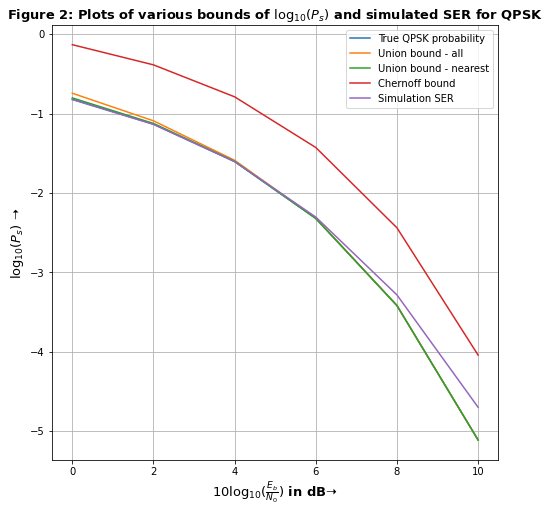

In [399]:
# Plotting the various bounds and simulation SER for QPSK

plt.figure(figsize=(8,8))
plt.plot(log_SNR, np.log10(P_e_QPSK), label = "True QPSK probability")
plt.plot(log_SNR, np.log10(p_unionbound_b1), label = "Union bound - all")
plt.plot(log_SNR, np.log10(p_unionbound_b2), label = "Union bound - nearest")
plt.plot(log_SNR, np.log10(p_chernoff_b3), label = "Chernoff bound")
plt.plot(log_SNR, np.log10(QPSK_SER_list), label = "Simulation SER")
plt.legend()
plt.grid(True)

plt.title(r"Figure 2: Plots of Various Bounds of $\log_{10}(P_s)$ and Simulated SER for QPSK", fontweight = 'bold', fontsize=13)
plt.xlabel(r"$10\log_{10}(\frac{E_b}{N_0})$ in dB" +"\u279d", fontweight='bold', fontsize=13)
plt.ylabel("$\log_{10}(P_s)$ \u279d", fontweight='bold', fontsize=13)

plt.show()

- It is noteworthy that all values nearly coincide. The union bounds are extremely close to the calculated error probabilities. (They are slightly higher than the calculated curve for the larger values of $N_0$.)
- The simulation error probabilities sometimes rise above the union bounds. This is because it is a simulation and can be randomly erroneous. It is not a true probability calculation.
- The Chernoff bound is significantly higher than all other bounds, although it it a useful tool to get a feel for the values of $P_e$.


## Parts (d), (e)

- In the 16QAM constellation, the values taken on both the axes are -3d, -d, +d, +3d.
- 1/4 of the points have real value = +3d, 1/4 have +d, 1/4 have -d, 1/4 have -3d. Similarly, for the imaginary value.
- Therefore, uniform random variables must be chosen for generating both the real and imaginary parts.
- In a [0,1) uniform random variable, the thresholds must be set as 0.25, 0.5, 0.75. Therefore, if $u \in U[0,1)$ :
\begin{align}
    0 \leq u < 0.25 &\implies value = -3d \\
    0.25 \leq u < 0.5 &\implies value = -d \\
    0.5 \leq u < 0.75 &\implies value = +d \\
    0.75 \leq u < 1 &\implies value = +3d \\
\end{align}

In [416]:
d=np.sqrt(Eb/2.5)       # The 1/sqrt(2.5) factor appearing again, similar to Q2 part (a)

# Generating transmitted complex symbols, real and imaginary parts as two random variables

real = np.random.uniform(size=10**5)        # First using a uniform r.v. in [0,1)
real[np.logical_and(real>=0, real<0.25)] = -3*d                        # Between 0 and 0.25 mapping to -3d
real[np.logical_and(real>=0.25, real<0.5)] = -d                          # Between 0.25 and 0.5 mapping to -d
real[np.logical_and(real>=0.5, real<0.75)] = d                        # Between 0.5 and 0.75 mapping to +d
real[np.logical_and(real>=0.75, real<1)] = 3*d                          # Between 0.75 and 1 mapping to +3d

img = np.random.uniform(size=10**5)         # Similarly for the imaginary part
img[np.logical_and(img>=0, img<0.25)] = -3*d                        # Between 0 and 0.25 mapping to -3d
img[np.logical_and(img>=0.25, img<0.5)] = -d                          # Between 0.25 and 0.5 mapping to -d
img[np.logical_and(img>=0.5, img<0.75)] = d                        # Between 0.5 and 0.75 mapping to +d
img[np.logical_and(img>=0.75, img<1)] = 3*d                          # Between 0.75 and 1 mapping to +3d

In [401]:
# List to store value of Simulation SER for each value of N0 for 16QAM
QAM_SER_list = []

for n0 in N0:
    real_pred = real + np.random.normal(loc=0, scale=np.sqrt(n0/2), size=10**5)     # Adding Gaussian noise to transmitted real value
    real_pred[real_pred<=-2*d] = -3*d
    real_pred[np.logical_and(real_pred>-2*d, real_pred<=0)] = -d
    real_pred[np.logical_and(real_pred>0, real_pred<=2*d)] = d
    real_pred[real_pred>2*d] = 3*d                                                  # Classifying based on decision rule which decides the received value
                                                                                    # according to which side of the midpoint of the nearest two values it lies
                                                                                    # For example, 2d is a decision threshold between d and 3d, and so on

    img_pred = img + np.random.normal(loc=0, scale=np.sqrt(n0/2), size=10**5)       # Similarly for imaginary part
    img_pred[img_pred<=-2*d] = -3*d
    img_pred[np.logical_and(img_pred>-2*d, img_pred<=0)] = -d
    img_pred[np.logical_and(img_pred>0, img_pred<=2*d)] = d
    img_pred[img_pred>2*d] = 3*d

    # Evaluating SER as 1 - (fraction of correctly received symbols), and storing in list
    # Adding a small value 1e-5 to avoid log(0) error while plotting
    QAM_SER_list.append(1 - (np.sum(np.logical_and(real == real_pred, img==img_pred))/len(real_pred))+1e-5)

In [402]:
Q_val_near= np.sqrt(2*Eb/(2.5*N0))

# Evaluating the bounds for 16-QAM, based on the new value of d and new Q-value
# Average number of nearest neighbours in the rectangular 16QAM constellation = (2*2 + 8*3 + 4*4)/16 = 3
# Therefore, this is the number used for the nearest neighbours union bound and the Chernoff bound

p_union_b2 = 3*Q(Q_val_near)
p_chernoff_b3 = 3*np.exp(-(np.sqrt(Eb/2.5))**2/N0)

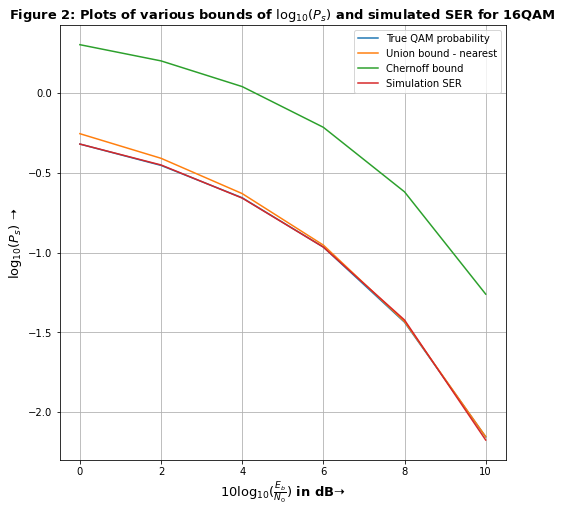

In [403]:
# Plotting the various bounds and simulation SER for 16QAM

plt.figure(figsize=(8,8))
plt.plot(log_SNR, np.log10(P_e_QAM), label = "True QAM probability")
plt.plot(log_SNR, np.log10(p_union_b2), label = "Union bound - nearest")
plt.plot(log_SNR, np.log10(p_chernoff_b3), label = "Chernoff bound")
plt.plot(log_SNR, np.log10(QAM_SER_list), label = "Simulation SER")
plt.legend()
plt.grid(True)

plt.title(r"Figure 3: Plots of Various Bounds of $\log_{10}(P_s)$ and Simulated SER for 16QAM", fontweight = 'bold', fontsize=13)
plt.xlabel(r"$10\log_{10}(\frac{E_b}{N_0})$ in dB" +"\u279d", fontweight='bold', fontsize=13)
plt.ylabel("$\log_{10}(P_s)$ \u279d", fontweight='bold', fontsize=13)

plt.show()

# Please note the different y-axis limits from the previous plots, despite appearing similar at first glance.

- Once again, the union bounds are extremely close to the calculated error probabilities. (They are slightly higher than the calculated curve for the larger values of $N_0$.)
- Once again, the Chernoff bound is significantly higher than all other bounds, although it it a useful tool to get a feel for the values of $P_e$.


## Part (f)

In [356]:
# QPSK case

d=np.sqrt(Eb)
real = np.random.choice([-d,d], size=10**5)
img = np.random.choice([-d,d], size=10**5)

# Empty lists to store the Gray-coded and non-Gray-coded BERs as we change N0

QPSK_BER_list_gray = []
QPSK_BER_list_nongray = []

for n0 in N0:
    real_pred = real + np.random.normal(loc=0, scale=np.sqrt(n0/2), size=10**5)     # Adding Gaussian noise to transmitted real value
    real_pred[real_pred<=0] = -d
    real_pred[real_pred>0] = d                              # Using the correlation metric threshold decision rule to decide received value

    img_pred = img + np.random.normal(loc=0, scale=np.sqrt(n0/2), size=10**5)       # Similarly for imaginary part
    img_pred[img_pred<=0] = -d
    img_pred[img_pred>0] = d
    
    gray_map = {(-d, d):'00', (d, d):'01',
                (-d, -d):'10', (d, -d):'11'}                # A Gray coding that ensure that the nearest neighbours are always only 1 bit different

    nongray_map = {(-d, d):'00', (d, d):'11',
                (-d, -d):'10', (d, -d):'01'}                # A non-Gray coding

    true_coords = np.array((real, img)).T
    true_coords = list(map(tuple, true_coords))             # Converting the transmitted coordinates into a list of tuples to use as keys for the dictionaries above
                                                            # to conveniently obtain corresponding binary coding

    pred_coords = np.array((real_pred, img_pred)).T
    pred_coords = list(map(tuple, pred_coords))             # Converting the predicted coordinates into a list of tuples

    gray_error_bits = nongray_error_bits = 0

    for i in range(len(true_coords)):

        # Accumulating the total number of bits changed between transmitted and received coordinates using bitwise XOR, for the Gray code 
        gray_error_bits += str(bin(int(gray_map[true_coords[i]], 2) ^ int(gray_map[pred_coords[i]], 2))).count('1')

        # Similarly, for the non-Gray code
        nongray_error_bits += str(bin(int(nongray_map[true_coords[i]], 2) ^ int(nongray_map[pred_coords[i]], 2))).count('1')

    # Storing the BER as the fraction of bits changed between transmitted and received coordinates
    # Adding a small value 1e-5 to avoid log(0) error while plotting

    QPSK_BER_list_gray.append(gray_error_bits/(2*len(real_pred))+1e-5)
    QPSK_BER_list_nongray.append(nongray_error_bits/(2*len(real_pred))+1e-5)

In [357]:
# 16QAM case

d=np.sqrt(Eb/2.5)       # The 1/sqrt(2.5) factor appearing again, similar to Q2 part (a)

real = np.random.choice([-3*d, -d, d, 3*d], size=10**5)
img = np.random.choice([-3*d, -d, d, 3*d], size=10**5)

QAM_BER_list_gray = []
QAM_BER_list_nongray = []
for n0 in N0:
    real_pred = real + np.random.normal(loc=0, scale=np.sqrt(n0/2), size=10**5)     # Adding Gaussian noise to transmitted real value
    real_pred[real_pred<=-2*d] = -3*d
    real_pred[np.logical_and(real_pred>-2*d, real_pred<=0)] = -d
    real_pred[np.logical_and(real_pred>0, real_pred<=2*d)] = d
    real_pred[real_pred>2*d] = 3*d                                                  # Classifying based on decision rule which decides the received value
                                                                                    # according to which side of the midpoint of the nearest two values it lies
                                                                                    # For example, 2d is a decision threshold between d and 3d, and so on

    img_pred = img + np.random.normal(loc=0, scale=np.sqrt(n0/2), size=10**5)       # Similarly for imaginary part
    img_pred[img_pred<=-2*d] = -3*d
    img_pred[np.logical_and(img_pred>-2*d, img_pred<=0)] = -d
    img_pred[np.logical_and(img_pred>0, img_pred<=2*d)] = d
    img_pred[img_pred>2*d] = 3*d

    gray_map = {(-3*d, 3*d):'0000', (-d, 3*d):'0001', (d, 3*d):'0101', (3*d, 3*d):'0100',
                (-3*d, d):'0010', (-d, d):'0011', (d, d):'0111', (3*d, d):'0110',
                (-3*d, -d):'1010', (-d, -d):'1011', (d, -d):'1111', (3*d, -d):'1110',
                (-3*d, -3*d):'1000', (-d, -3*d):'1001', (d, -3*d):'1101', (3*d, -3*d):'1100'}       # A Gray coding

    nongray_map = {(-3*d, 3*d):'0000', (-d, 3*d):'1111', (d, 3*d):'1100', (3*d, 3*d):'0101',
                (-3*d, d):'0110', (-d, d):'1101', (d, d):'1011', (3*d, d):'0001',
                (-3*d, -d):'0100', (-d, -d):'0011', (d, -d):'1110', (3*d, -d):'1010',
                (-3*d, -3*d):'0010', (-d, -3*d):'1001', (d, -3*d):'0111', (3*d, -3*d):'1000'}       # A non-Gray coding

    true_coords = np.array((real, img)).T
    true_coords = list(map(tuple, true_coords))                                     # Converting the transmitted coordinates into a list of tuples as before

    pred_coords = np.array((real_pred, img_pred)).T
    pred_coords = list(map(tuple, pred_coords))                                     # Converting the predicted coordinates into a list of tuples

    gray_error_bits = nongray_error_bits = 0

    for i in range(len(true_coords)):

        # Accumulating the total number of bits changed between transmitted and received coordinates using bitwise XOR, for the Gray code
        gray_error_bits += str(bin(int(gray_map[true_coords[i]], 2) ^ int(gray_map[pred_coords[i]], 2))).count('1')

        # Similarly, for the non-Gray code
        nongray_error_bits += str(bin(int(nongray_map[true_coords[i]], 2) ^ int(nongray_map[pred_coords[i]], 2))).count('1')

    # Storing the BER as the fraction of bits changed between transmitted and received coordinates
    # Adding a small value 1e-5 to avoid log(0) error while plotting

    QAM_BER_list_gray.append(gray_error_bits/(4*len(real_pred))+1e-5)
    QAM_BER_list_nongray.append(nongray_error_bits/(4*len(real_pred))+1e-5)

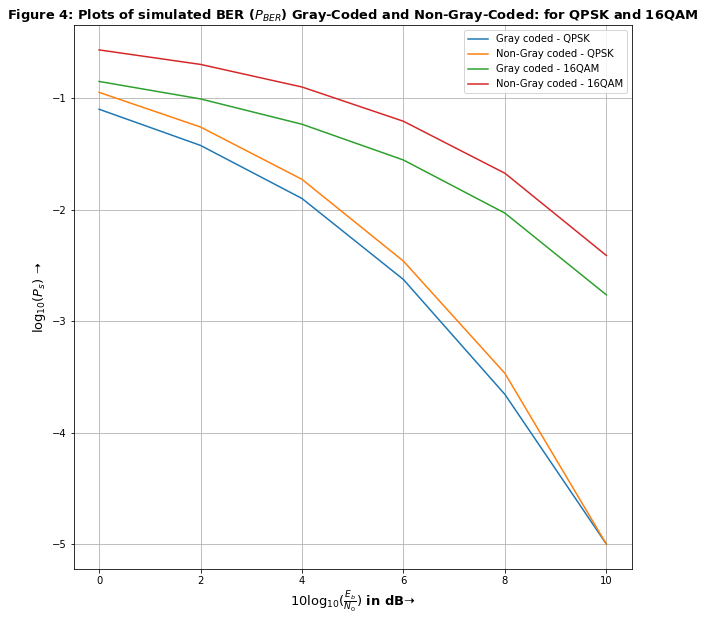

In [405]:
# Plotting all the Gray and non-Gray BERs together, for both QPSK and 16QAM

plt.figure(figsize=(10,10))
plt.plot(log_SNR, np.log10(QPSK_BER_list_gray), label = "Gray coded - QPSK")
plt.plot(log_SNR, np.log10(QPSK_BER_list_nongray), label = "Non-Gray coded - QPSK")

plt.plot(log_SNR, np.log10(QAM_BER_list_gray), label = "Gray coded - 16QAM")
plt.plot(log_SNR, np.log10(QAM_BER_list_nongray), label = "Non-Gray coded - 16QAM")

plt.legend()
plt.grid(True)

plt.title(r"Figure 4: Plots of simulated BER ($P_{BER}$) Gray-Coded and Non-Gray-Coded: for QPSK and 16QAM", fontweight = 'bold', fontsize=13)
plt.xlabel(r"$10\log_{10}(\frac{E_b}{N_0})$ in dB" +"\u279d", fontweight='bold', fontsize=13)
plt.ylabel("$\log_{10}(P_s)$ \u279d", fontweight='bold', fontsize=13)

plt.show()

- The Gray codings do better than the non-Gray codings for both QPSK and 16QAM, which is expected since Gray coding is optimised to minimise bit error rate.